# BOLT DATA ANALYTICS WORKSHOP

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


### STEP 1: Setup and Imports

Importing dependencies in a Jupyter notebook or any Python script is like getting tools from a toolbox. Imagine you have a big toolbox full of different tools (modules or libraries) that you might need for your work. When you import a dependency, you're essentially reaching into this toolbox and taking out the specific tool you need to get a particular job done.

We will be using some python libraries to help us process and visualize our data, as well as machine learning libraries to help us build, train, and test our model!

In [1]:
import pandas as pd                                                       # data manipulation and analysis
import numpy as np                                                        # numerical computations and array operations
import seaborn as sns                                                     # statistical data visualization
import matplotlib.pyplot as plt                                           # creating plots and visualizations
from sklearn.model_selection import train_test_split, cross_val_score     # splitting data and cross-validation
from sklearn.preprocessing import StandardScaler, OneHotEncoder           # preprocessing tools for scaling and encoding
from sklearn.impute import SimpleImputer                                  # preprossessing tools for handling missing values
from sklearn.linear_model import LinearRegression                         # regression analysis
import tensorflow as tf                                                   # neural network
from sklearn.neighbors import KNeighborsRegressor                         # knn model
from sklearn.metrics import mean_squared_error                            # used for model evaluation

### STEP 2: Collecting data

We will be using the California Housing Prices dataset from Kaggle. There are also other ways of obtaining datasets, including building your own by collecting your own data, web scraping, or using APIs.


It has been downloaded into this repository into the same folder as our notebook. 
Let's call read_csv from the pandas library to help us load in this dataset.

In [2]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### STEP 3: Feature Engineering

Feature engineering is the process of transforming raw data into formats that are better suited for machine learning models. It's like taking raw information and turning it into something more useful and informative. 

In the case of the housing dataset, we create new features, such as the average number of bedrooms and rooms per household. This tells us how much space is available on average for each family or household in the area. We also remove the total bedrooms and rooms features.

In [3]:
df['avg_bedrooms_per_household'] = df['total_bedrooms'] / df['households']
df['avg_rooms_per_household'] = df['total_rooms'] / df['households']

# Drop the original total bedrooms and total rooms features
df.drop(['total_bedrooms', 'total_rooms'], axis=1, inplace=True)

Note: The usual process of feature engineering is usually not so intuitive, a computer usually does this by identifying patterns in the data that may or may not be relevant but are usually difficult to determine manually.


### STEP 4: Cleaning and Preprocessing

Quality of data is important not only because it is aesthetically pleasing, but also helps us make more accurate predictions.
Data cleaning is like tidying up a messy room before inviting guests over. It involves finding and fixing mistakes, inconsistencies, and missing pieces in your dataset so that it's accurate and ready for analysis.

We need to do data cleaning because:


**Accuracy:** Clean data ensures that our analysis and results are accurate. Errors or inconsistencies in the data can lead to incorrect conclusions.

**Reliability:** Clean data makes our analysis more reliable. We can trust the insights and decisions based on clean data.

**Consistency:** Cleaning data ensures that all the data points are in a consistent format, making it easier to work with and analyze.

We assigned the dataset to the variable "df", so if we call df we will be able to inspect its content!

In [4]:
df

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,avg_bedrooms_per_household,avg_rooms_per_household
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.023810,6.984127
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.971880,6.238137
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.073446,8.288136
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.073059,5.817352
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.081081,6.281853
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,INLAND,1.133333,5.045455
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,INLAND,1.315789,6.114035
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,INLAND,1.120092,5.205543
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,INLAND,1.171920,5.329513


We can see that we have several numerical columns as well as one categorical column. This is a good time to think about the question you'd like to explore with this dataset. 

We can either
* find relationships and explanations in the data (statistics)
* use the data to build a model that can predict new data (machine learning)

**Today we will be trying to predict median house value.**

There's a couple neat little functions called describe() and info() which helps us summarize some statistics about this dataset.

In [5]:
df.describe()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,avg_bedrooms_per_household,avg_rooms_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,1425.476744,499.539680,3.870671,206855.816909,1.097062,5.429000
std,2.003532,2.135952,12.585558,1132.462122,382.329753,1.899822,115395.615874,0.476104,2.474173
min,-124.350000,32.540000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.333333,0.846154
25%,-121.800000,33.930000,18.000000,787.000000,280.000000,2.563400,119600.000000,1.006029,4.440716
50%,-118.490000,34.260000,29.000000,1166.000000,409.000000,3.534800,179700.000000,1.048889,5.229129
75%,-118.010000,37.710000,37.000000,1725.000000,605.000000,4.743250,264725.000000,1.099631,6.052381
max,-114.310000,41.950000,52.000000,35682.000000,6082.000000,15.000100,500001.000000,34.066667,141.909091


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   population                  20640 non-null  float64
 4   households                  20640 non-null  float64
 5   median_income               20640 non-null  float64
 6   median_house_value          20640 non-null  float64
 7   ocean_proximity             20640 non-null  object 
 8   avg_bedrooms_per_household  20433 non-null  float64
 9   avg_rooms_per_household     20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Now let's visualize the distribution of the attributes by plotting histograms of the attributes.

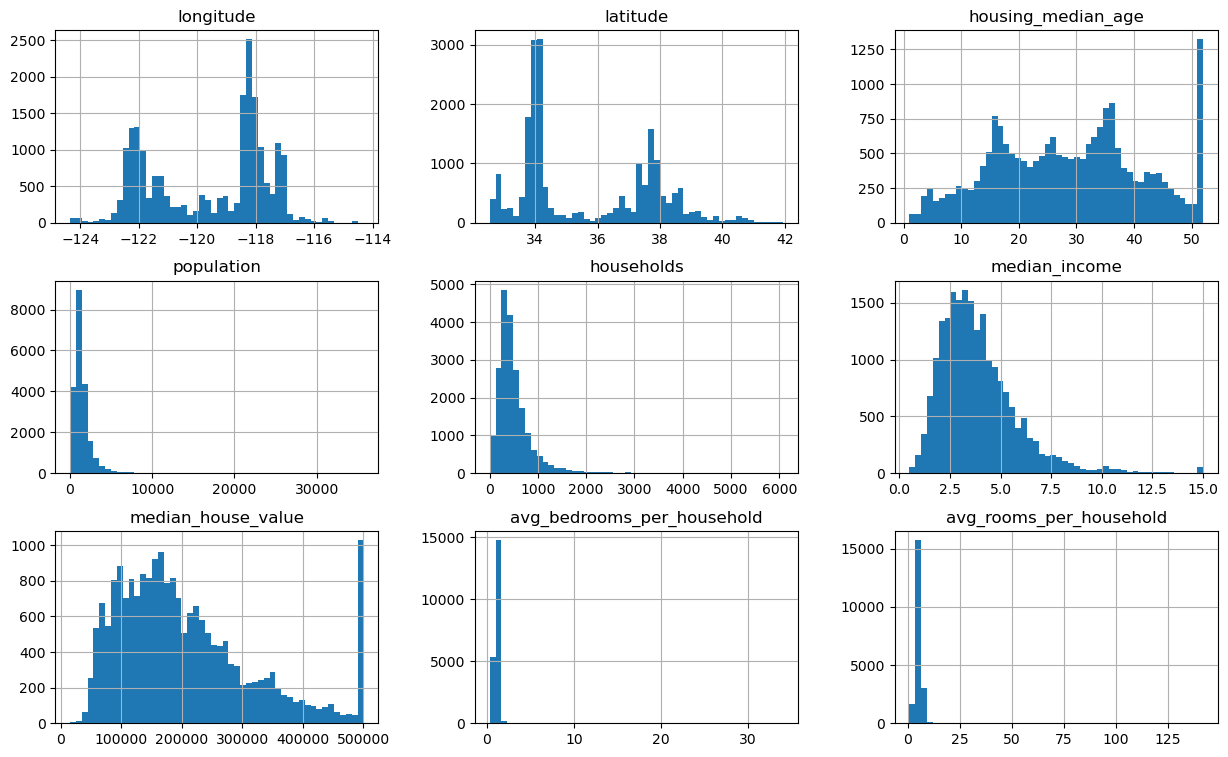

In [7]:
pd.DataFrame(df).hist(bins=50, figsize=(15,9));plt.show()

Some things we like to look for:

* Data distribution
* Outliers
* Odd patterns in data 
* Axis Scale 

### Missing Values

The first step of preprocessing we want to consider is dealing with null values.

In [8]:
df.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity                 0
avg_bedrooms_per_household    207
avg_rooms_per_household         0
dtype: int64

For which attribute do you see null values? Why do you think missing data may be an issue?

There are many ways we can choose to deal with null values
* delete columns
* delete rows
* fill in with most frequent value
* **fill in with a special, separate value**

In [9]:
imputer = SimpleImputer(strategy='mean')
df['avg_bedrooms_per_household'] = imputer.fit_transform(df[['avg_bedrooms_per_household']])

Let's check if there are any null values again.

In [10]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
avg_bedrooms_per_household    0
avg_rooms_per_household       0
dtype: int64

### Scaling

There's still some more potential problems, can anyone spot one of them?

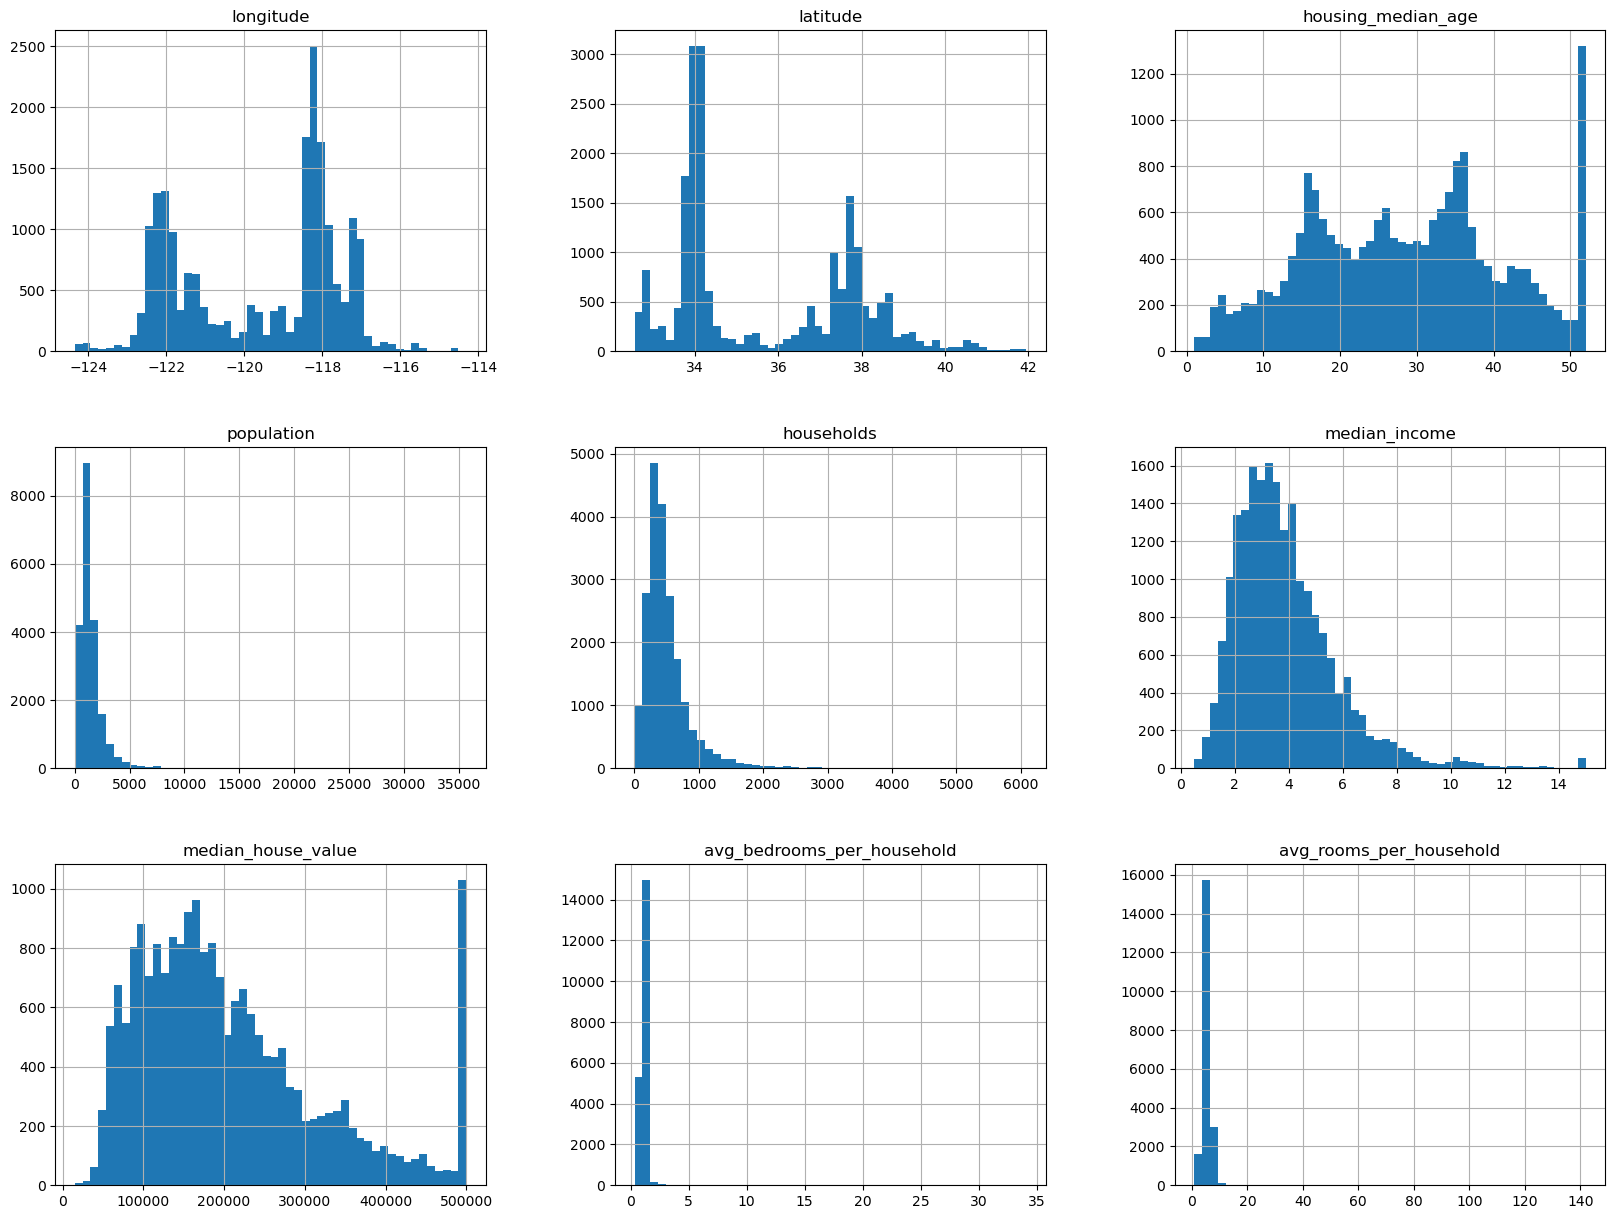

In [11]:
df.hist(bins=50,figsize=(20,15))
plt.show()

That's right! The data is on different scales for each attribute. It may not be obvious now, but look what happens when we plot attributes of different scales against one another! Do you see a difference in the scaled and unscaled versions?

![title](scaling.png)

In [12]:
scaler = StandardScaler()
numerical_cols = ['longitude', 'latitude', 'housing_median_age', 'avg_bedrooms_per_household', 'avg_rooms_per_household', 'population', 'households', 'median_income']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [13]:
df

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,avg_bedrooms_per_household,avg_rooms_per_household
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,452600.0,NEAR BAY,-0.154640,0.628559
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,358500.0,NEAR BAY,-0.264265,0.327041
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,352100.0,NEAR BAY,-0.049855,1.155620
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,341300.0,NEAR BAY,-0.050671,0.156966
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,342200.0,NEAR BAY,-0.033737,0.344711
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.512592,-0.443449,-1.216128,78100.0,INLAND,0.076570,-0.155023
20636,-0.818722,1.806329,-0.845393,-0.944405,-1.008420,-0.691593,77100.0,INLAND,0.461743,0.276881
20637,-0.823713,1.778237,-0.924851,-0.369537,-0.174042,-1.142593,92300.0,INLAND,0.048617,-0.090318
20638,-0.873626,1.778237,-0.845393,-0.604429,-0.393753,-1.054583,84700.0,INLAND,0.158027,-0.040211


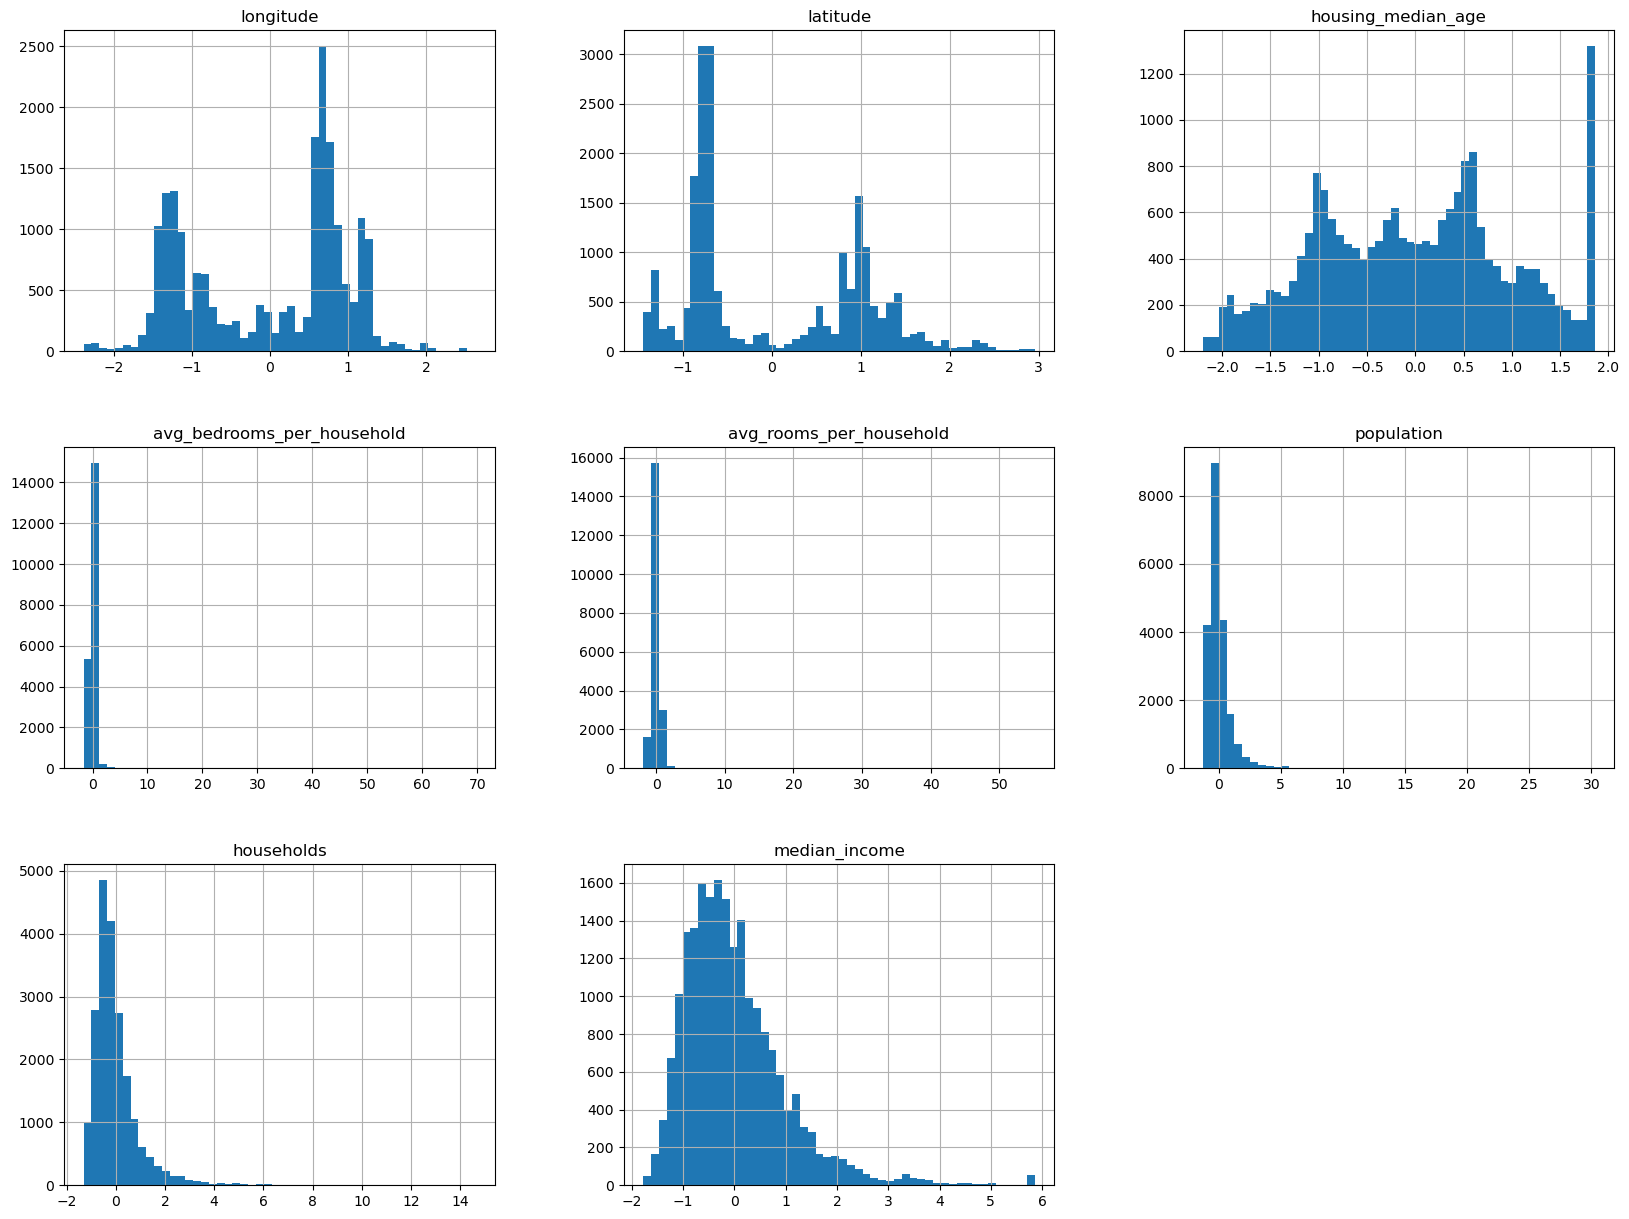

In [14]:
df[numerical_cols].hist(bins=50,figsize=(20,15))
plt.show()

We can see the scales look much more alike now. This process is important because  machine learning algorithms are sensitive to the scale of the features. Scaling ensures that all features contribute equally to the analysis.

### Categorical Variables

It seems like regression might be a good model to use for our data. However, we have one problem. Can we do linear regression on a categorical variable?

Encoding is a process used to convert categorical variables into numerical format. We will use something called OneHotEncoding to create binary columns for each category in the categorical variable, indicating the presence or absence of that category in each data point.

If you had a list of different types of pets (like cats, dogs, and fish), how could you turn that into numbers that a computer could understand?

Why might it be important for a computer to see categories like "small," "medium," and "large" as numbers instead?

Can you think of a situation where it would be tricky to turn words into numbers for a computer program?

In [15]:
encoder = OneHotEncoder(sparse_output=False)
encoded_ocean_proximity = encoder.fit_transform(df[['ocean_proximity']])

# Get the unique categories from 'ocean_proximity'
categories = encoder.categories_[0]

# Create new column names for the encoded features
new_columns = [f'ocean_proximity_{category}' for category in categories]

# Create a DataFrame for the encoded features with the new column names
encoded_df = pd.DataFrame(encoded_ocean_proximity, columns=new_columns)

# Concatenate the encoded features DataFrame with the original DataFrame
df = pd.concat([df.drop(['ocean_proximity'], axis=1), encoded_df], axis=1)

In [16]:
df

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,avg_bedrooms_per_household,avg_rooms_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,452600.0,-0.154640,0.628559,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,358500.0,-0.264265,0.327041,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,352100.0,-0.049855,1.155620,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,341300.0,-0.050671,0.156966,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,342200.0,-0.033737,0.344711,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.512592,-0.443449,-1.216128,78100.0,0.076570,-0.155023,0.0,1.0,0.0,0.0,0.0
20636,-0.818722,1.806329,-0.845393,-0.944405,-1.008420,-0.691593,77100.0,0.461743,0.276881,0.0,1.0,0.0,0.0,0.0
20637,-0.823713,1.778237,-0.924851,-0.369537,-0.174042,-1.142593,92300.0,0.048617,-0.090318,0.0,1.0,0.0,0.0,0.0
20638,-0.873626,1.778237,-0.845393,-0.604429,-0.393753,-1.054583,84700.0,0.158027,-0.040211,0.0,1.0,0.0,0.0,0.0


Note: This dataset happened to have attributes that are easy to understand, and has already been tidied up for us and is ready for us to use. In other cases, the data must go through more extensive cleaning techniques we won't go over today.

### Correlation Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

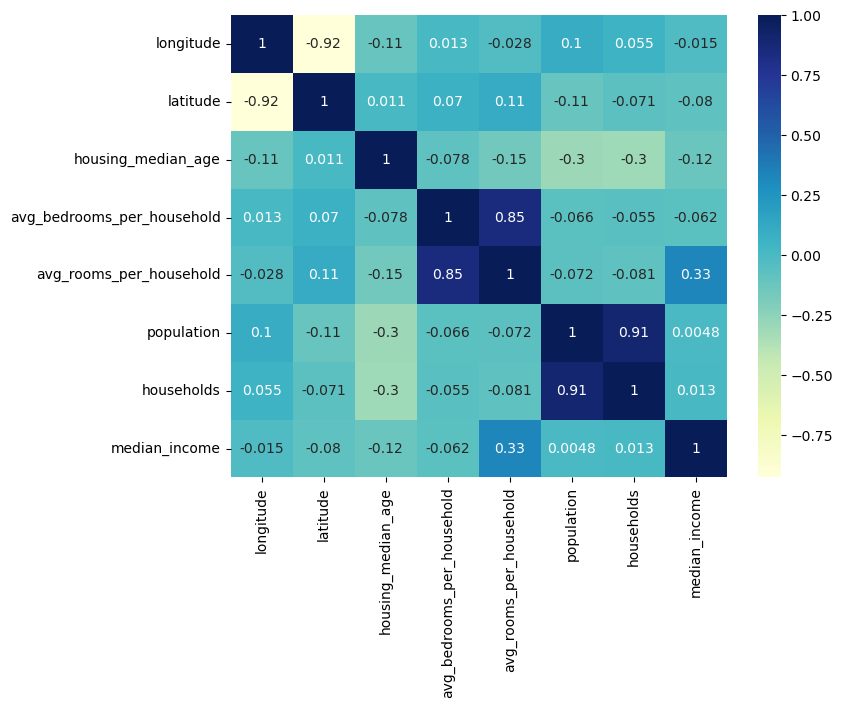

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(),cmap='YlGnBu',annot=True)
plt.show

A **correlation matrix** is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, it means that when one variable moves, the other variable tends to move in a specific direction consistently.


### STEP 5: Lets train and test some models!

First, we need to split the data into training and test sets. Imagine you're analyzing data to make better business decisions, like predicting customer preferences or optimizing marketing strategies. Train-test splitting is setting aside a portion of your data as a test group, similar to how you might test a new product idea with a small group of customers before launching it to everyone. This test group helps you check if your predictions or strategies work well in real-world scenarios, beyond just what you've observed in your training data.

Now, splitting X and y is separating the factors (X) that influence an outcome (y) in your business. For example, if you're trying to predict sales (y), X could include factors like advertising spending, customer demographics, and economic conditions. By splitting X and y, you're ensuring that your model learns how these "X" factors impact sales, helping you make more accurate predictions.


In [18]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Here's a simple way to understand machine learning:

**Learning from Data**: Just like you study past business trends and customer behavior to make decisions, machine learning algorithms learn from historical data. For example, they can analyze sales data to understand what factors lead to higher sales.

**Making Predictions**: After learning from the data, machine learning algorithms can make predictions about future trends or outcomes. For instance, they can predict customer preferences or forecast sales for upcoming months based on patterns they've learned.

**Continuous Improvement**: One of the strengths of machine learning is its ability to continuously improve. As new data becomes available, the algorithms can update their understanding and predictions, helping businesses stay adaptive and competitive.

We're going to compare 3 models today, namely a linear regression model, a k-nearest neighbors model, and a simple neural network. We wont be going into the details of these models, there's alot to talk about with these models that we unfortunately dont have the time to go over today. If yall want to play around with these models, ChatGPT (which in itself is an advanced neural network lol) is already an excellent tool that can spit out this code for you in seconds. However, this may not always work and you need some understanding of the models to be able to work with them effectively. Anyway, let's test the models on our cleaned dataset.

In [19]:
# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_score = linear_reg.score(X_test, y_test)

# K-Nearest Neighbours Model
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, y_train)
knn_score = knn_model.score(X_test, y_test)

# Neural Network Model
neural_model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                                    tf.keras.layers.Dense(1)])  
neural_model.compile(optimizer='adam', loss='mean_squared_error')
neural_model.fit(X_train, y_train, epochs=100, verbose=0)
y_pred_nn = neural_model.predict(X_test)
nn_score = 1 - np.sum((y_test - y_pred_nn.squeeze())**2) / np.sum((y_test - np.mean(y_test))**2)

# Selecting a single tuple from X_test for prediction comparison
test_instance = X_test.iloc[0].values.reshape(1, -1) 
actual_y = y_test.iloc[0]

predictions = {
    'Linear Regression': linear_reg.predict(test_instance),
    'K-Nearest Neighbors': knn_model.predict(test_instance),
    'Neural Network': neural_model.predict(test_instance).squeeze(),
    'Actual Value': actual_y
}

# Creating a table for comparison
comparison_table = pd.DataFrame(predictions, index=["Prediction"])

# Displaying scores and the comparison table
print(f"Linear Regression Score: {linear_score:.2f}")
print(f"K-Nearest Neighbors Score: {knn_score:.2f}")
print(f"Neural Network Score: {nn_score:.2f}")
comparison_table

1/1 [==============================] - 0s 31ms/step
Linear Regression Score: 0.63
K-Nearest Neighbors Score: 0.72
Neural Network Score: 0.55


/Users/stal03/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/stal03/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


,Linear Regression,K-Nearest Neighbors,Neural Network,Actual Value
Prediction,51141.792996,52380.0,53100.859375,47700.0


### STEP 6: Comparing Models

**K-Nearest Neighbors (KNN) (0.72)** - It has the best performance among the three models in terms of explaining the variance in the data. This suggests that the KNN model is relatively effective at capturing the patterns in the dataset.

**Linear Regression (0.63)** While it is not as effective as the KNN model, it still provides a reasonably good fit to the data. This model benefits from simplicity and interpretability, which might make it a preferred choice if the goal is to understand the relationship between variables.

**Neural Network (0.55)** - Despite neural networks' potential to model complex nonlinear relationships, in this case, it has the poorest performance. This could be due to various factors.

### THE END!!!